### Importing the required libraries and suppressing the warnings

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing required libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [4]:
# Set_option to avoid truncation of columns and rows:-

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the "Leads" Dataset and checking the data

In [5]:
# Importing dataset 'Lead' into 'leads_df':-

leads_df=pd.read_csv('Leads.csv')

In [6]:
# Displaying the first five rows of 'leads_df' dataframe

leads_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [7]:
# Inspect the shape of the dataset

leads_df.shape

(9240, 37)

In [8]:
# Checking the info to see the data types of the feature variables and the null values present

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Checking the statistical summary of the dataset

leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

In [10]:
# Inspecting the different columns in the dataset

leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [11]:
# Checking datatype of columns:-

leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

### Data Preparation and Cleaning

In [12]:
# converting the column headers to lower case

leads_df.columns = leads_df.columns.str.lower()
leads_df.columns

Index(['prospect id', 'lead number', 'lead origin', 'lead source', 'do not email', 'do not call', 'converted', 'totalvisits', 'total time spent on website', 'page views per visit', 'last activity', 'country', 'specialization', 'how did you hear about x education', 'what is your current occupation', 'what matters most to you in choosing a course', 'search', 'magazine', 'newspaper article', 'x education forums', 'newspaper', 'digital advertisement', 'through recommendations', 'receive more updates about our courses', 'tags', 'lead quality', 'update me on supply chain content', 'get updates on dm content', 'lead profile', 'city', 'asymmetrique activity index', 'asymmetrique profile index', 'asymmetrique activity score', 'asymmetrique profile score', 'i agree to pay the amount through cheque', 'a free copy of mastering the interview', 'last notable activity'], dtype='object')

In [13]:
# checking for duplicate values and dropping the row in case of duplicates

leads_df.drop_duplicates(subset=None, inplace=True)

In [14]:
leads_df.shape

(9240, 37)

there are no duplicate rows as none of the rows were dropped

In [15]:
# Checking the number of missing values in each column

leads_df.isnull().sum().sort_values(ascending=False)


lead quality                                     4767
asymmetrique activity index                      4218
asymmetrique profile score                       4218
asymmetrique activity score                      4218
asymmetrique profile index                       4218
tags                                             3353
lead profile                                     2709
what matters most to you in choosing a course    2709
what is your current occupation                  2690
country                                          2461
how did you hear about x education               2207
specialization                                   1438
city                                             1420
page views per visit                              137
totalvisits                                       137
last activity                                     103
lead source                                        36
receive more updates about our courses              0
i agree to pay the amount th

In [16]:
# Checking the percentage of missing values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

lead quality                                     51.59
asymmetrique activity index                      45.65
asymmetrique profile score                       45.65
asymmetrique activity score                      45.65
asymmetrique profile index                       45.65
tags                                             36.29
lead profile                                     29.32
what matters most to you in choosing a course    29.32
what is your current occupation                  29.11
country                                          26.63
how did you hear about x education               23.89
specialization                                   15.56
city                                             15.37
page views per visit                              1.48
totalvisits                                       1.48
last activity                                     1.11
lead source                                       0.39
receive more updates about our courses            0.00
i agree to

#### dropping columns with more than 35% of missing values

In [17]:
leads_df = leads_df.drop(['lead quality','asymmetrique activity index','asymmetrique profile score','asymmetrique activity score','asymmetrique profile index','tags'],axis=1)

In [18]:
# Checking the percentage of missing values in each column again

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

what matters most to you in choosing a course    29.32
lead profile                                     29.32
what is your current occupation                  29.11
country                                          26.63
how did you hear about x education               23.89
specialization                                   15.56
city                                             15.37
page views per visit                              1.48
totalvisits                                       1.48
last activity                                     1.11
lead source                                       0.39
get updates on dm content                         0.00
newspaper                                         0.00
i agree to pay the amount through cheque          0.00
a free copy of mastering the interview            0.00
update me on supply chain content                 0.00
receive more updates about our courses            0.00
through recommendations                           0.00
digital ad

In [19]:
# Checking the value counts of all the columns

for column in leads_df:
    print(leads_df[column].value_counts())
    print('___________________________________________________')

prospect id
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
lead number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
lead origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


### few observations made from checking the value counts of all the columns:

- The columns 'do not call', 'search', 'magazine', 'newspaper article', 'x education forums', 'newspaper', 'digital advertisement', 'through recommendations', 'receive more updates about our courses', 'update me on supply chain content', 'get updates on dm content' and 'i agree to pay the amount through cheque'  have majority of 'No' values. As these columns are heavily skewed, we will drop them.

- The column 'country' is heavily skewed as almost 70% of the data lies in one value 'India' and as such can be dropped. 

- The column 'city' has two values 'mumbai' and 'select' which make up almost 60% of the data. Since select is a default value which the users have left blank, it is as good as null value. We will be dropping this column as it is also heavily skewed.

- The column 'what matters most to you in choosing a course' is also heavily skewed as most of the values are present in a single category - 'Better Career Prospects', as such this can be dropped.

In [20]:
leads_df.drop(['do not call','search','magazine','newspaper article','x education forums','newspaper','digital advertisement','through recommendations','receive more updates about our courses','update me on supply chain content','get updates on dm content','i agree to pay the amount through cheque','country','city','what matters most to you in choosing a course'], axis = 1, inplace = True)

In [21]:
# Checking the columns after dropping

leads_df.columns

Index(['prospect id', 'lead number', 'lead origin', 'lead source', 'do not email', 'converted', 'totalvisits', 'total time spent on website', 'page views per visit', 'last activity', 'specialization', 'how did you hear about x education', 'what is your current occupation', 'lead profile', 'a free copy of mastering the interview', 'last notable activity'], dtype='object')

In [22]:
# Checking the percentage of missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

lead profile                              29.32
what is your current occupation           29.11
how did you hear about x education        23.89
specialization                            15.56
totalvisits                                1.48
page views per visit                       1.48
last activity                              1.11
lead source                                0.39
prospect id                                0.00
lead number                                0.00
lead origin                                0.00
do not email                               0.00
converted                                  0.00
total time spent on website                0.00
a free copy of mastering the interview     0.00
last notable activity                      0.00
dtype: float64

In [23]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   prospect id                             9240 non-null   object 
 1   lead number                             9240 non-null   int64  
 2   lead origin                             9240 non-null   object 
 3   lead source                             9204 non-null   object 
 4   do not email                            9240 non-null   object 
 5   converted                               9240 non-null   int64  
 6   totalvisits                             9103 non-null   float64
 7   total time spent on website             9240 non-null   int64  
 8   page views per visit                    9103 non-null   float64
 9   last activity                           9137 non-null   object 
 10  specialization                          7802 non-null   obje

### While checking the value counts of columns, We notice that few of the columns have 'select' value in them

In [24]:
# finding the columns with 'select' value in them

cols=list(leads_df.columns)
for i in cols:
    if 'Select' in leads_df[i].values:
        print(i)

specialization
how did you hear about x education
lead profile


#### Visualising and Analysing these columns

#### specialization

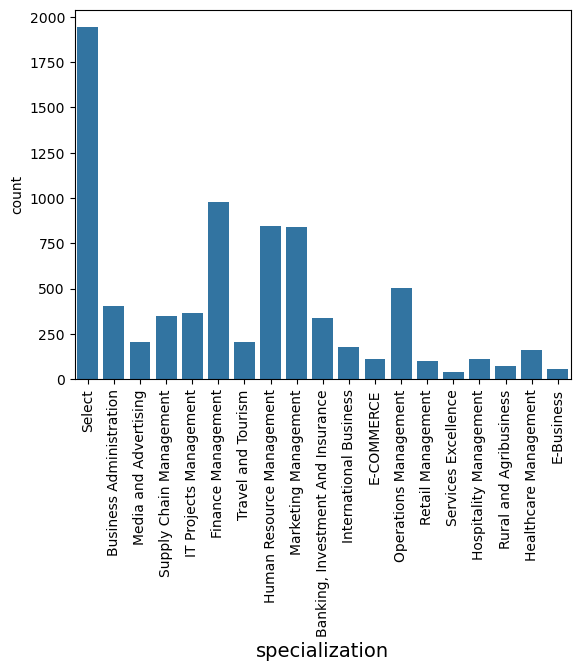

In [25]:
sns.countplot(x= 'specialization', data= leads_df)
plt.xlabel('specialization',size = 14)
plt.xticks(rotation = 90)
plt.show()

In [26]:
leads_df['specialization'].value_counts()

specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [27]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students and don't have a specialization yet. So we will replace 'select' values here with 'Not Specified'

leads_df['specialization'] = leads_df['specialization'].replace('Select', 'Not Specified')

In [28]:
# We can also impute the null values to the 'Not Specified' category.

leads_df['specialization'].fillna('Not Specified',inplace=True)

In [29]:
leads_df['specialization'].value_counts()

specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### how did you hear about x education

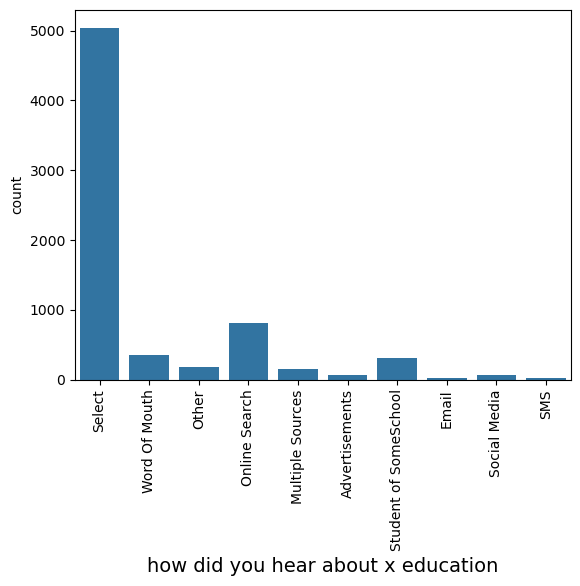

In [30]:
sns.countplot(x= 'how did you hear about x education', data= leads_df)
plt.xlabel('how did you hear about x education',size = 14)
plt.xticks(rotation = 90)
plt.show()

In [31]:
leads_df['how did you hear about x education'].value_counts()

how did you hear about x education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

#### lead profile

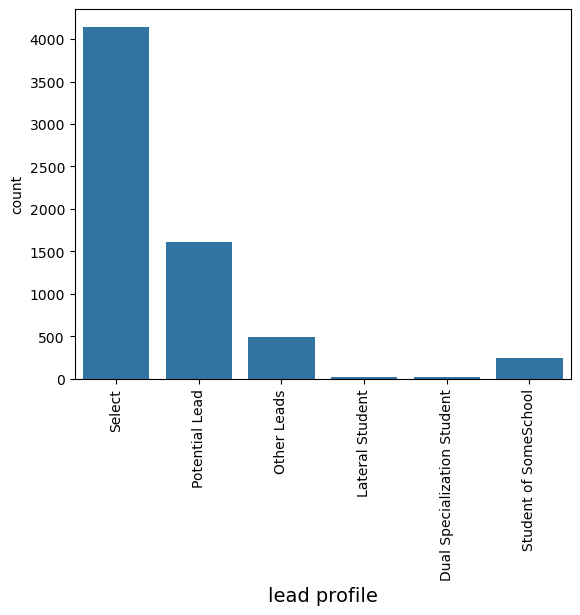

In [32]:
sns.countplot(x= 'lead profile', data= leads_df)
plt.xlabel('lead profile',size = 14)
plt.xticks(rotation = 90)
plt.show()

In [33]:
leads_df['lead profile'].value_counts()

lead profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

As the columns 'how did you hear about x education' and 'lead profile' have high number of null values and also the value of the category 'select' is high compared to other categories, we can drop these columns as they are highly skewed and might affect our analysis. 

In [34]:
leads_df.drop(['how did you hear about x education','lead profile'], axis = 1, inplace = True)

In [35]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

what is your current occupation           29.11
totalvisits                                1.48
page views per visit                       1.48
last activity                              1.11
lead source                                0.39
prospect id                                0.00
lead number                                0.00
lead origin                                0.00
do not email                               0.00
converted                                  0.00
total time spent on website                0.00
specialization                             0.00
a free copy of mastering the interview     0.00
last notable activity                      0.00
dtype: float64

In [36]:
leads_df['what is your current occupation'].value_counts()

what is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [37]:
# We can also impute the null values to the 'Not Specified' category.

leads_df['what is your current occupation'].fillna('Not Specified',inplace=True)

In [38]:
leads_df['what is your current occupation'].value_counts()

what is your current occupation
Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [39]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

totalvisits                               1.48
page views per visit                      1.48
last activity                             1.11
lead source                               0.39
prospect id                               0.00
lead number                               0.00
lead origin                               0.00
do not email                              0.00
converted                                 0.00
total time spent on website               0.00
specialization                            0.00
what is your current occupation           0.00
a free copy of mastering the interview    0.00
last notable activity                     0.00
dtype: float64

In [40]:
leads_df.isnull().sum()

prospect id                                 0
lead number                                 0
lead origin                                 0
lead source                                36
do not email                                0
converted                                   0
totalvisits                               137
total time spent on website                 0
page views per visit                      137
last activity                             103
specialization                              0
what is your current occupation             0
a free copy of mastering the interview      0
last notable activity                       0
dtype: int64

In [41]:
leads_df.shape

(9240, 14)

##### Since the number of rows with null values are very less (1.48%), we will remove these rows

In [42]:
leads_df = leads_df[~pd.isna(leads_df['totalvisits'])]

In [43]:
leads_df.shape

(9103, 14)

In [44]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

lead source                               0.32
prospect id                               0.00
lead number                               0.00
lead origin                               0.00
do not email                              0.00
converted                                 0.00
totalvisits                               0.00
total time spent on website               0.00
page views per visit                      0.00
last activity                             0.00
specialization                            0.00
what is your current occupation           0.00
a free copy of mastering the interview    0.00
last notable activity                     0.00
dtype: float64

In [45]:
leads_df = leads_df[~pd.isna(leads_df['lead source'])]

In [46]:
leads_df.shape

(9074, 14)

In [47]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

prospect id                               0.0
lead number                               0.0
lead origin                               0.0
lead source                               0.0
do not email                              0.0
converted                                 0.0
totalvisits                               0.0
total time spent on website               0.0
page views per visit                      0.0
last activity                             0.0
specialization                            0.0
what is your current occupation           0.0
a free copy of mastering the interview    0.0
last notable activity                     0.0
dtype: float64

In [48]:
# we will drop the columns 'prospect id' and 'lead number' as these are the unique values assigned to each lead

leads_df.drop(['prospect id','lead number'], axis = 1, inplace = True)

In [49]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead origin                             9074 non-null   object 
 1   lead source                             9074 non-null   object 
 2   do not email                            9074 non-null   object 
 3   converted                               9074 non-null   int64  
 4   totalvisits                             9074 non-null   float64
 5   total time spent on website             9074 non-null   int64  
 6   page views per visit                    9074 non-null   float64
 7   last activity                           9074 non-null   object 
 8   specialization                          9074 non-null   object 
 9   what is your current occupation         9074 non-null   object 
 10  a free copy of mastering the interview  9074 non-null   object 
 

In [50]:
leads_df.shape

(9074, 12)

### EDA

### Univariate Analysis

In [51]:
#Checking value count of target variable 'Converted':-

leads_df.converted.value_counts()

converted
0    5639
1    3435
Name: count, dtype: int64

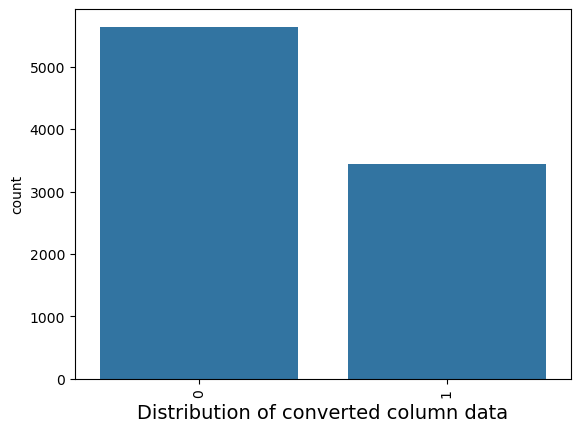

In [52]:
# Plotting the converted column to get a clear view of the data distribution

sns.countplot(x='converted', data= leads_df)
plt.xlabel('Distribution of converted column data',size = 14)
plt.xticks(rotation = 90)
plt.show()

In [53]:
#Checking ratio of imbalance:-

((leads_df.converted==1).sum()/(leads_df.converted==0).sum())*100

60.91505586096826

From value counts and countplot of the 'converted' column, we can see that the data distribution is balanced with respect to ratio

### Analyzing Categorical Variables

In [54]:
# checking data types of the columns

leads_df.dtypes

lead origin                                object
lead source                                object
do not email                               object
converted                                   int64
totalvisits                               float64
total time spent on website                 int64
page views per visit                      float64
last activity                              object
specialization                             object
what is your current occupation            object
a free copy of mastering the interview     object
last notable activity                      object
dtype: object

In [55]:
object_columns = leads_df.select_dtypes(include=['object']).columns


In [56]:
object_columns.values

array(['lead origin', 'lead source', 'do not email', 'last activity',
       'specialization', 'what is your current occupation',
       'a free copy of mastering the interview', 'last notable activity'],
      dtype=object)

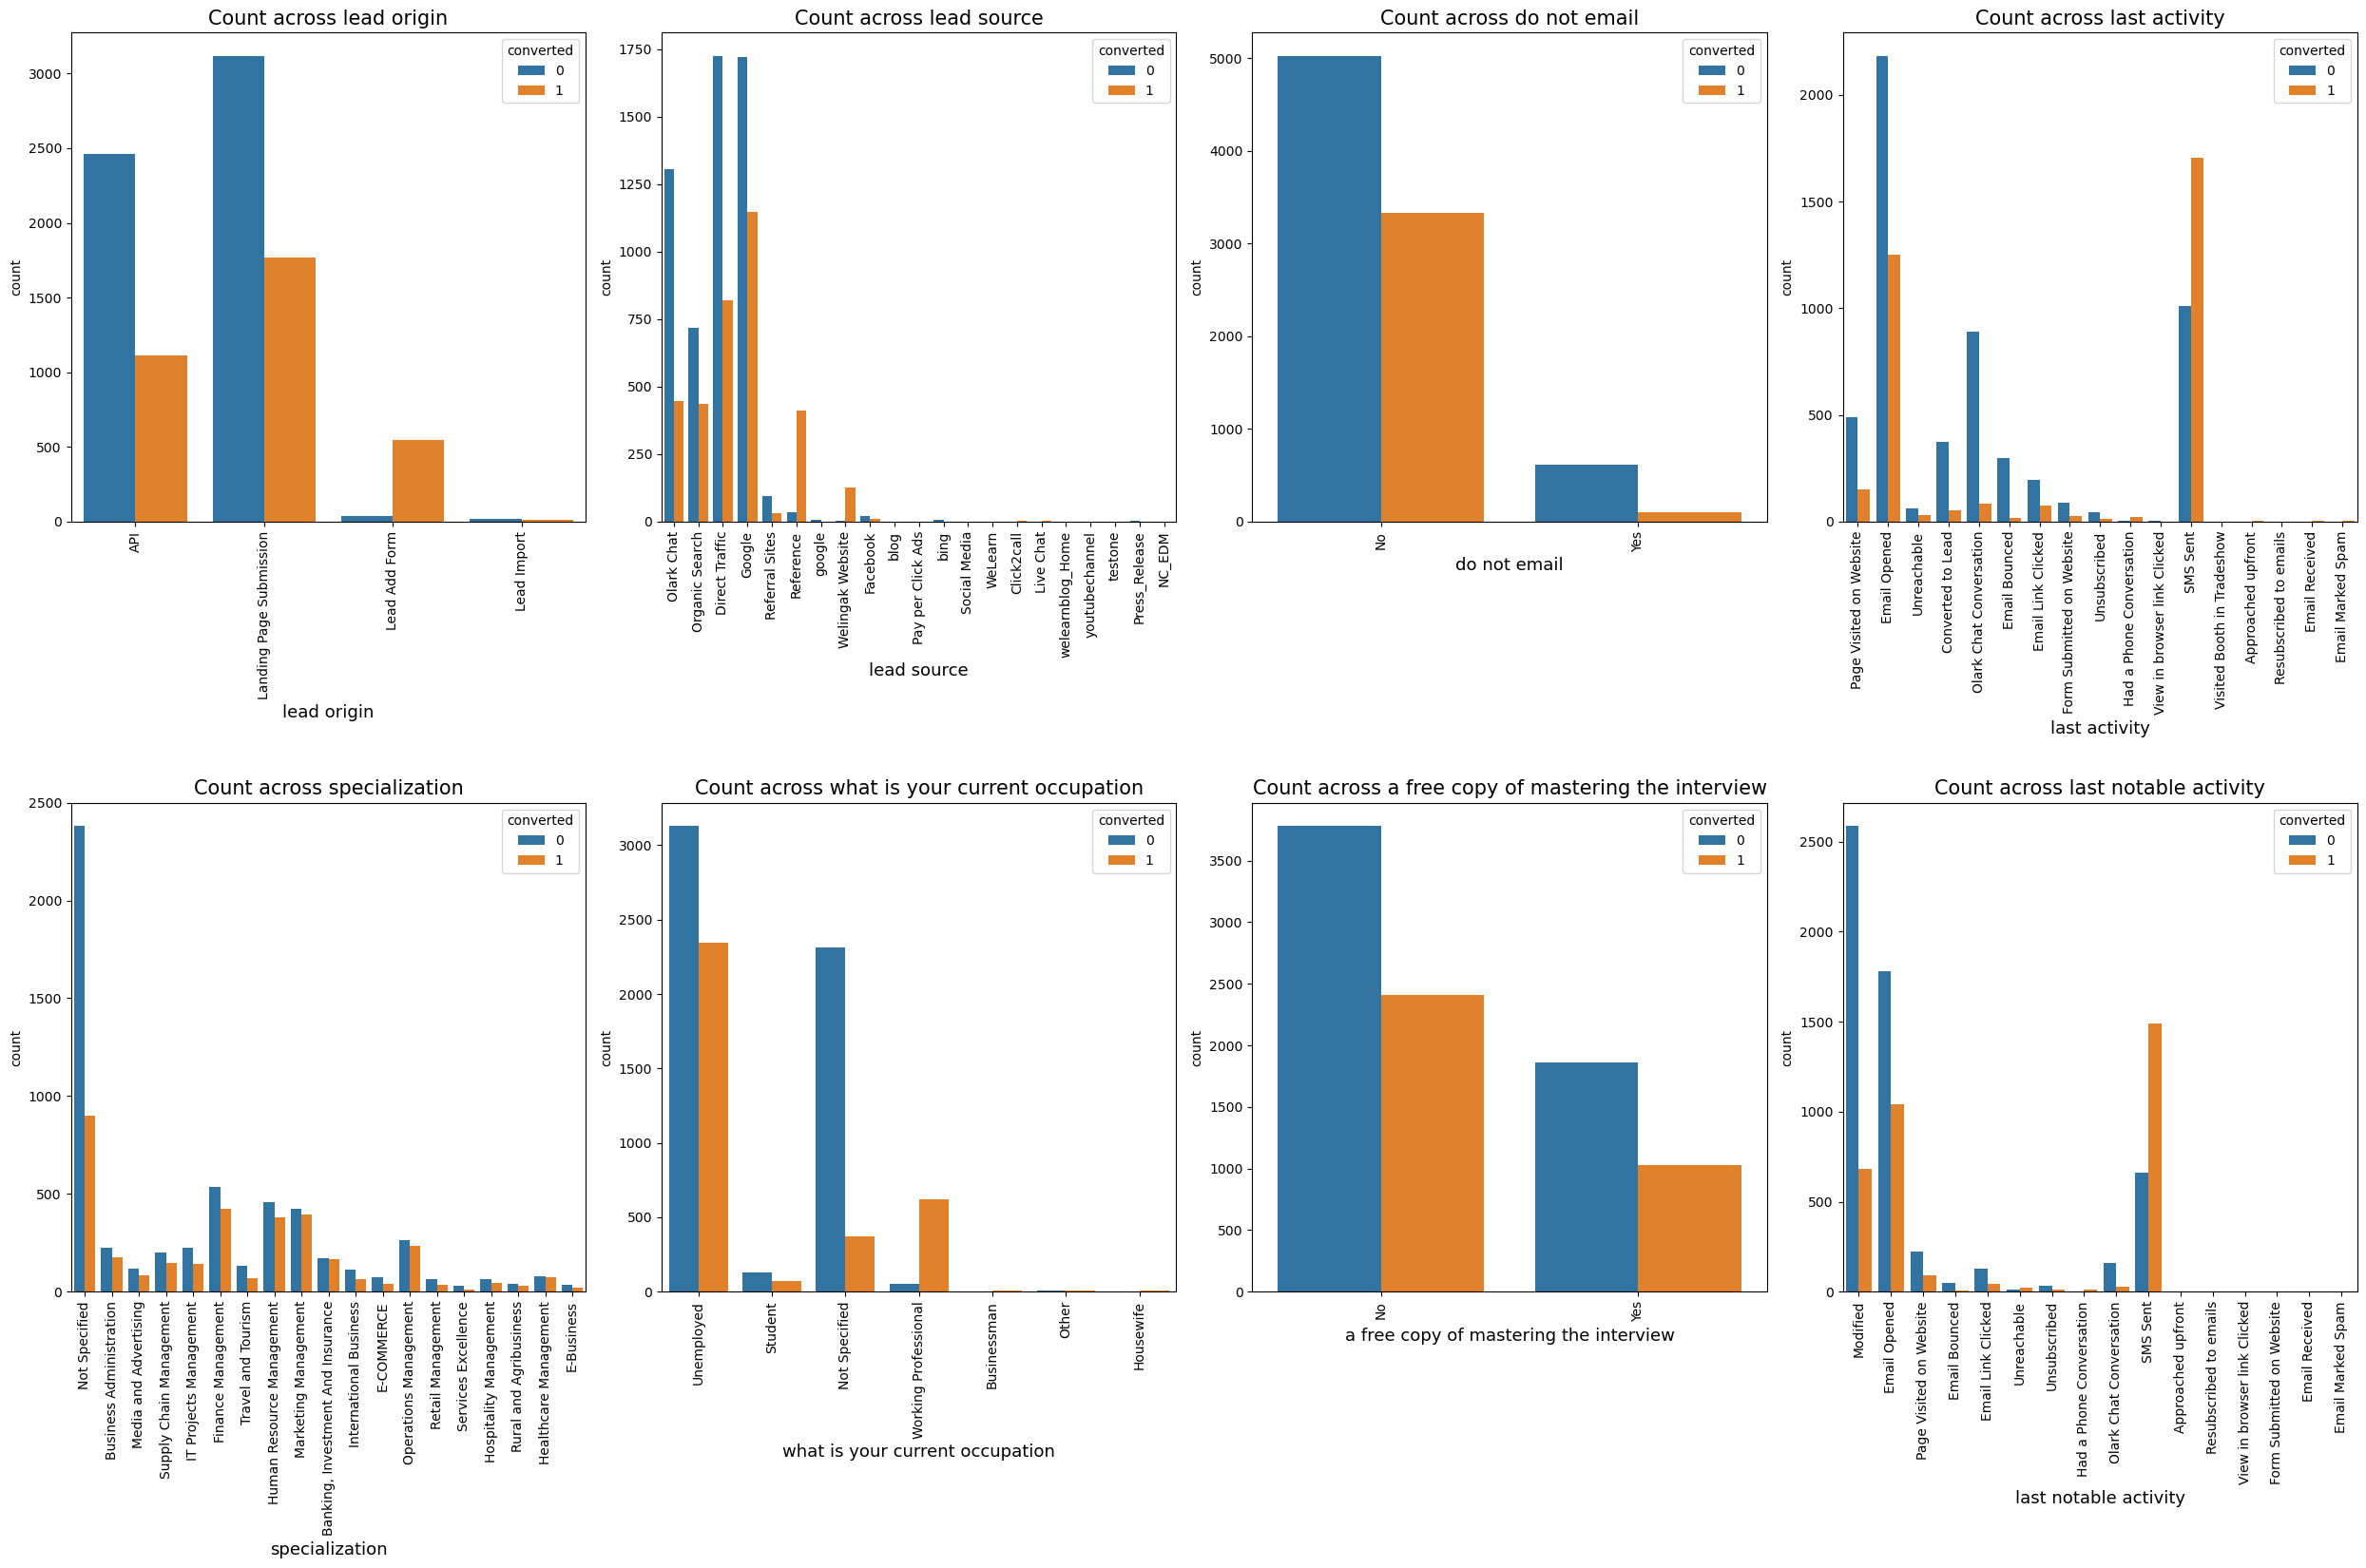

In [57]:
def countplot(z, fig):
    plt.subplot(4,4, fig)
    sns.countplot(x = leads_df[z],hue = "converted", data= leads_df)
    plt.title('Count across'+' '+ z, size = 15)
    plt.xlabel(z,size = 13)
    plt.xticks(rotation = 90)

plt.figure(figsize=(25,30))


countplot('lead origin',1)
countplot('lead source',2)
countplot('do not email',3)
countplot('last activity',4)
countplot('specialization',5)
countplot('what is your current occupation',6)
countplot('a free copy of mastering the interview',7)
countplot('last notable activity',8)

plt.tight_layout()

### Observations and Recommendations

- Lead Origin:
    - For 'Lead Add Form' successfull conversion is more than not converted
    - Count of 'Lead Import' is less.
    - To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission and generate more leads from Lead Add Form.

- Lead Source:
    - Google and Direct traffic generate maximum number of leads.
    - Conversion rate of 'Reference' and 'Welingak Website' leads is high.
    - To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

- Last Activity:
    - Highest count of last activity of leads is 'Email Opened'
    - Leads to whom the last activity was 'sms sent' have a higher conversion rate

- Specialization:
    - Count of various 'Management' specialization is high.
    - 'Marketing management' has the highest conversion rate

- What is your current Occupation:
    - The highest count is of unemployed people as they could be students
    - Conversion rate is higher for 'Working Professionals'.
    - To improve overall lead conversion rate, we need to focus more on improving lead conversion of 'unemployed people' such as students and generate more leads from 'Working Professionals'.

- Last notable activity:
    - Highest count of last notable activity of leads is 'Email Opened', 'Modified' and 'SMS sent'.
    - Leads to whom the last notable activity was 'sms sent' have the highest conversion rate.
    - This column looks highly related to 'Last Activity' column, which we will drop to avoid multicolinearity

In [58]:
# Dropping column 'last Notable Activity':-

leads_df.drop('last notable activity',axis = 1,inplace=True)

In [59]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead origin                             9074 non-null   object 
 1   lead source                             9074 non-null   object 
 2   do not email                            9074 non-null   object 
 3   converted                               9074 non-null   int64  
 4   totalvisits                             9074 non-null   float64
 5   total time spent on website             9074 non-null   int64  
 6   page views per visit                    9074 non-null   float64
 7   last activity                           9074 non-null   object 
 8   specialization                          9074 non-null   object 
 9   what is your current occupation         9074 non-null   object 
 10  a free copy of mastering the interview  9074 non-null   object 
d

### Analyzing Numerical Variables

In [60]:
# checking data types of the columns

leads_df.dtypes

lead origin                                object
lead source                                object
do not email                               object
converted                                   int64
totalvisits                               float64
total time spent on website                 int64
page views per visit                      float64
last activity                              object
specialization                             object
what is your current occupation            object
a free copy of mastering the interview     object
dtype: object

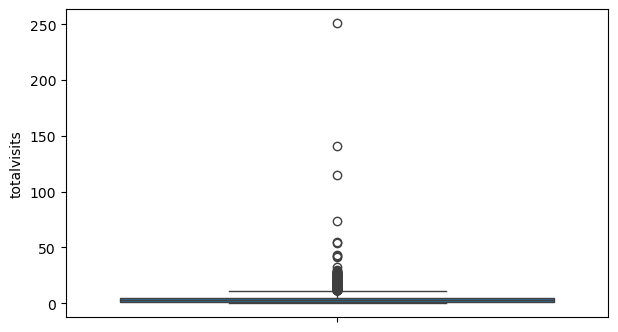

In [61]:
# Plotting a boxplot for 'totalvisits'

plt.figure(figsize = (7,4))
sns.boxplot(leads_df['totalvisits'])
plt.show()

#### We can see from above box plot that outliers are present in the upper range, so need to treat outliers.

In [62]:
# Treating outliers by capping upper range to 0.99:-

Q3 = leads_df.totalvisits.quantile(0.99)

leads_df = leads_df[(leads_df.totalvisits <= Q3)]

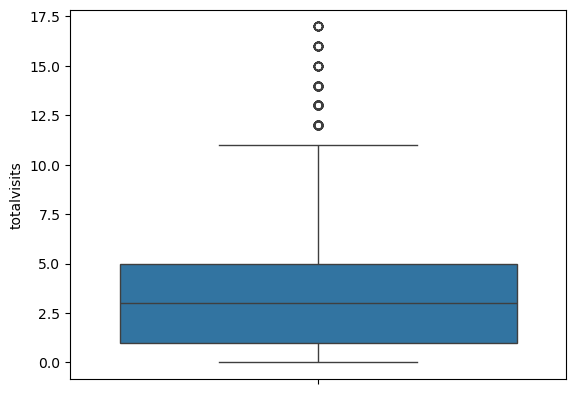

In [63]:
sns.boxplot(leads_df['totalvisits'])
plt.show()

##### We have treated the outliers

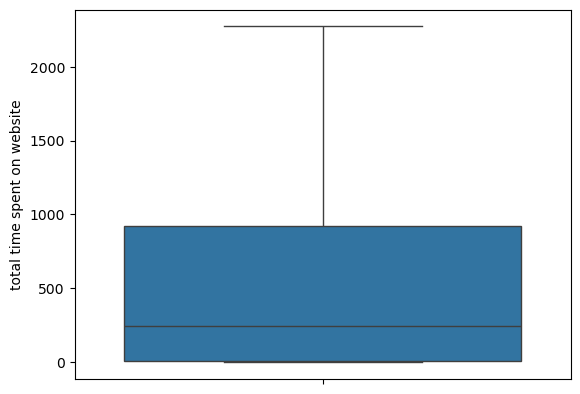

In [64]:
# plotting a box plot for 'total time spent on website'

sns.boxplot(leads_df['total time spent on website'])
plt.show()

We can see that there are no outliers, so we can proceed

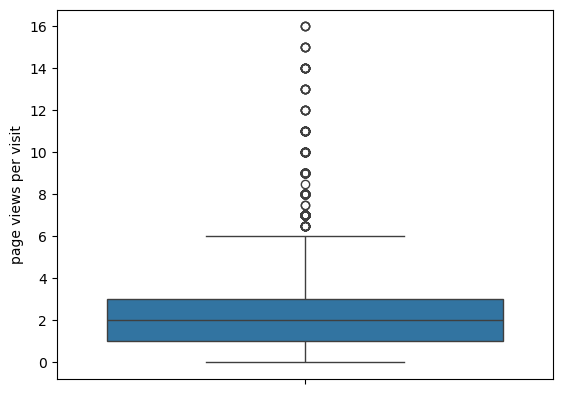

In [65]:
# plotting a box plot for 'page views per visit'

sns.boxplot(leads_df['page views per visit'])
plt.show()

We will need to treat the extreme outliers

In [66]:
# Treating upper range outliers by capping upper range to 0.99:-

Q3 = leads_df['page views per visit'].quantile(0.99)

leads_df = leads_df[(leads_df['page views per visit'] <= Q3)]

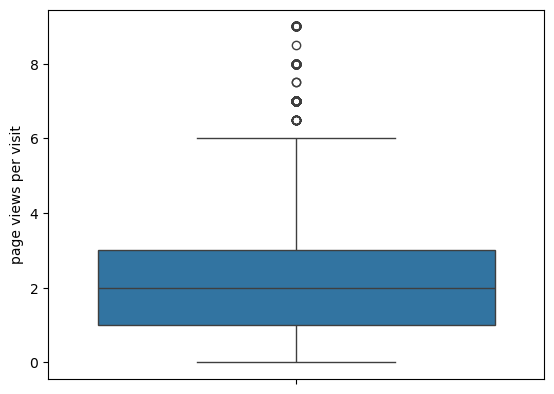

In [67]:
# checing the box plot for 'page views per visit'

sns.boxplot(leads_df['page views per visit'])
plt.show()

We have treated the extreme outliers

### Bivariate analysis

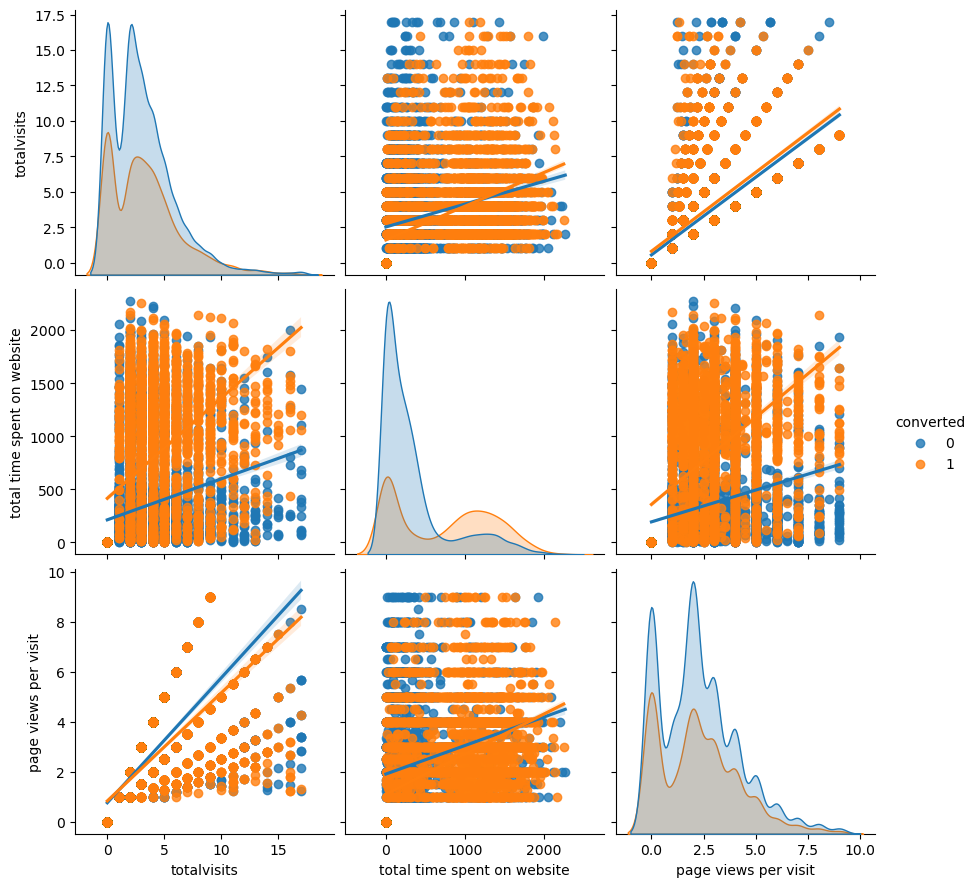

In [68]:
sns.pairplot(data=leads_df, hue='converted', kind='reg', height=3)
plt.show()

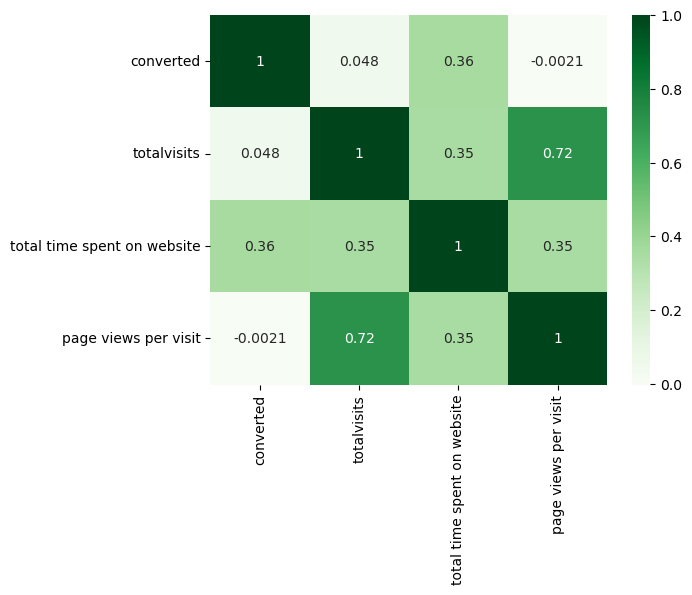

In [69]:
# Heatmap to understand the attributes correlation:-

sns.heatmap(leads_df[leads_df.columns[3:7]].corr(),annot = True,cmap='Greens')
plt.show()

Observations:
- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

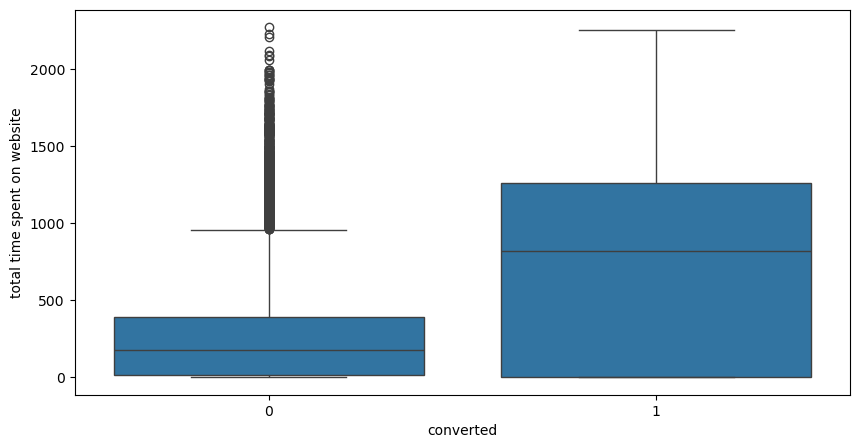

In [70]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='converted', y='total time spent on website',data=leads_df)
plt.show()

Leads spending more time on website are more likely to opt for courses and get converted

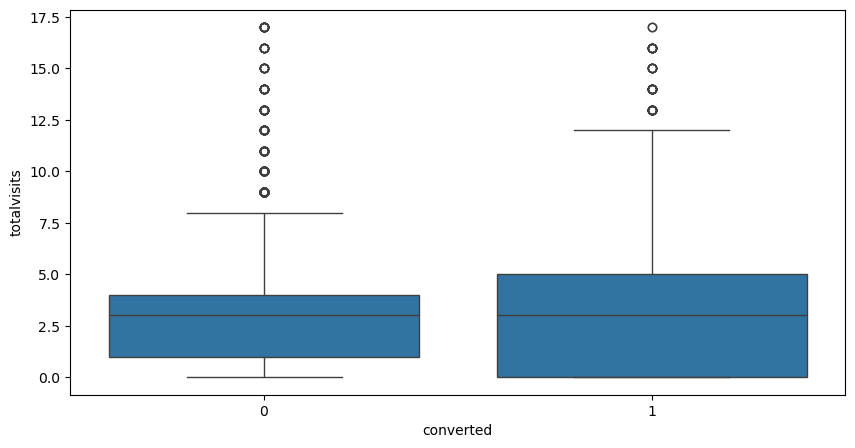

In [71]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'totalvisits', x = 'converted', data = leads_df)
plt.show()

From above plot we can see that median for converted and non-converted is approx same

## Data Preparation

In [72]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead origin                             8924 non-null   object 
 1   lead source                             8924 non-null   object 
 2   do not email                            8924 non-null   object 
 3   converted                               8924 non-null   int64  
 4   totalvisits                             8924 non-null   float64
 5   total time spent on website             8924 non-null   int64  
 6   page views per visit                    8924 non-null   float64
 7   last activity                           8924 non-null   object 
 8   specialization                          8924 non-null   object 
 9   what is your current occupation         8924 non-null   object 
 10  a free copy of mastering the interview  8924 non-null   object 
d

In [73]:
# Converting some binary variables (Yes/No) to 0/1

var =  ['do not email','a free copy of mastering the interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:-

leads_df[var] = leads_df[var].apply(binary_map)

In [74]:
leads_df.head()

lead origin     lead source  do not email  converted  totalvisits  total time spent on website  page views per visit            last activity           specialization what is your current occupation  a free copy of mastering the interview
0                      API      Olark Chat             0          0          0.0                            0                   0.0  Page Visited on Website            Not Specified                      Unemployed                                       0
1                      API  Organic Search             0          0          5.0                          674                   2.5             Email Opened            Not Specified                      Unemployed                                       0
2  Landing Page Submission  Direct Traffic             0          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                       1
3  Landing Page Submission  Direct Traffic             0          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                       0
4  Landing Page Submission          Google             0          1          2.0                         1428                   1.0        Converted to Lead            Not Specified                      Unemployed                                       0

### Creating Dummy Variable

For categorical variables with multiple levels, create dummy features

In [75]:
# Creating list 'cat_col' of categorical columns :-

cat_col= leads_df.select_dtypes(include=['object']).columns
cat_col

Index(['lead origin', 'lead source', 'last activity', 'specialization', 'what is your current occupation'], dtype='object')

In [76]:
# Creating dummy variables for the categorical variables and dropping the first one using 'drop_first=True':

dummy = pd.get_dummies(leads_df[['lead origin', 'lead source', 'last activity', 'specialization', 'what is your current occupation']], drop_first=True).astype(int)

dummy.head()

lead origin_Landing Page Submission  lead origin_Lead Add Form  lead origin_Lead Import  lead source_Direct Traffic  lead source_Facebook  lead source_Google  lead source_Live Chat  lead source_NC_EDM  lead source_Olark Chat  lead source_Organic Search  lead source_Pay per Click Ads  lead source_Press_Release  lead source_Reference  lead source_Referral Sites  lead source_Social Media  lead source_WeLearn  lead source_Welingak Website  lead source_bing  lead source_blog  lead source_google  lead source_testone  lead source_welearnblog_Home  lead source_youtubechannel  last activity_Converted to Lead  last activity_Email Bounced  last activity_Email Link Clicked  last activity_Email Marked Spam  last activity_Email Opened  last activity_Email Received  last activity_Form Submitted on Website  last activity_Had a Phone Conversation  last activity_Olark Chat Conversation  last activity_Page Visited on Website  last activity_Resubscribed to emails  last activity_SMS Sent  \
0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                                     0                       0   
1                                    0                          0                        0                           0                     0                   0                      0                   0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
2                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
3                                    1             

In [77]:
# Adding dummy variables dataset 'dummy' to original dataset 'leads_df':-

leads_df= pd.concat([dummy,leads_df],axis = 1)

In [78]:
leads_df.head()

lead origin_Landing Page Submission  lead origin_Lead Add Form  lead origin_Lead Import  lead source_Direct Traffic  lead source_Facebook  lead source_Google  lead source_Live Chat  lead source_NC_EDM  lead source_Olark Chat  lead source_Organic Search  lead source_Pay per Click Ads  lead source_Press_Release  lead source_Reference  lead source_Referral Sites  lead source_Social Media  lead source_WeLearn  lead source_Welingak Website  lead source_bing  lead source_blog  lead source_google  lead source_testone  lead source_welearnblog_Home  lead source_youtubechannel  last activity_Converted to Lead  last activity_Email Bounced  last activity_Email Link Clicked  last activity_Email Marked Spam  last activity_Email Opened  last activity_Email Received  last activity_Form Submitted on Website  last activity_Had a Phone Conversation  last activity_Olark Chat Conversation  last activity_Page Visited on Website  last activity_Resubscribed to emails  last activity_SMS Sent  \
0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                                     0                       0   
1                                    0                          0                        0                           0                     0                   0                      0                   0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
2                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
3                                    1             

In [79]:
leads_df.shape

(8924, 74)

In [80]:
# Dropping repeated columns for which dummy variables were created:-

leads_df.drop(['lead origin', 'lead source', 'last activity', 'specialization', 'what is your current occupation'],axis = 1,inplace = True)

In [81]:
leads_df.head()

lead origin_Landing Page Submission  lead origin_Lead Add Form  lead origin_Lead Import  lead source_Direct Traffic  lead source_Facebook  lead source_Google  lead source_Live Chat  lead source_NC_EDM  lead source_Olark Chat  lead source_Organic Search  lead source_Pay per Click Ads  lead source_Press_Release  lead source_Reference  lead source_Referral Sites  lead source_Social Media  lead source_WeLearn  lead source_Welingak Website  lead source_bing  lead source_blog  lead source_google  lead source_testone  lead source_welearnblog_Home  lead source_youtubechannel  last activity_Converted to Lead  last activity_Email Bounced  last activity_Email Link Clicked  last activity_Email Marked Spam  last activity_Email Opened  last activity_Email Received  last activity_Form Submitted on Website  last activity_Had a Phone Conversation  last activity_Olark Chat Conversation  last activity_Page Visited on Website  last activity_Resubscribed to emails  last activity_SMS Sent  \
0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                                     0                       0   
1                                    0                          0                        0                           0                     0                   0                      0                   0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
2                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
3                                    1             

In [82]:
leads_df.shape

(8924, 69)

In [83]:
# Checking data types of the columns

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   lead origin_Landing Page Submission                   8924 non-null   int32  
 1   lead origin_Lead Add Form                             8924 non-null   int32  
 2   lead origin_Lead Import                               8924 non-null   int32  
 3   lead source_Direct Traffic                            8924 non-null   int32  
 4   lead source_Facebook                                  8924 non-null   int32  
 5   lead source_Google                                    8924 non-null   int32  
 6   lead source_Live Chat                                 8924 non-null   int32  
 7   lead source_NC_EDM                                    8924 non-null   int32  
 8   lead source_Olark Chat                                8924 non-

All the columns contain numeric variables now

## Test-Train Split

In [84]:
# Adding feature variable to X

X = leads_df.drop(['converted'], axis=1)

# Displaying head :-

X.head()

lead origin_Landing Page Submission  lead origin_Lead Add Form  lead origin_Lead Import  lead source_Direct Traffic  lead source_Facebook  lead source_Google  lead source_Live Chat  lead source_NC_EDM  lead source_Olark Chat  lead source_Organic Search  lead source_Pay per Click Ads  lead source_Press_Release  lead source_Reference  lead source_Referral Sites  lead source_Social Media  lead source_WeLearn  lead source_Welingak Website  lead source_bing  lead source_blog  lead source_google  lead source_testone  lead source_welearnblog_Home  lead source_youtubechannel  last activity_Converted to Lead  last activity_Email Bounced  last activity_Email Link Clicked  last activity_Email Marked Spam  last activity_Email Opened  last activity_Email Received  last activity_Form Submitted on Website  last activity_Had a Phone Conversation  last activity_Olark Chat Conversation  last activity_Page Visited on Website  last activity_Resubscribed to emails  last activity_SMS Sent  \
0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                                     0                       0   
1                                    0                          0                        0                           0                     0                   0                      0                   0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
2                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                                     0                       0   
3                                    1             

In [85]:
# Adding response variable to y

y = leads_df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [86]:
# Splitting the data into train and test data with 70:30 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=85)

In [87]:
# Checking shape of 'X_train' dataset

X_train.shape

(6246, 68)

In [88]:
# Checking shape of 'X_test' dataset

X_test.shape

(2678, 68)

In [89]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   lead origin_Landing Page Submission                   8924 non-null   int32  
 1   lead origin_Lead Add Form                             8924 non-null   int32  
 2   lead origin_Lead Import                               8924 non-null   int32  
 3   lead source_Direct Traffic                            8924 non-null   int32  
 4   lead source_Facebook                                  8924 non-null   int32  
 5   lead source_Google                                    8924 non-null   int32  
 6   lead source_Live Chat                                 8924 non-null   int32  
 7   lead source_NC_EDM                                    8924 non-null   int32  
 8   lead source_Olark Chat                                8924 non-

In [90]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['totalvisits','total time spent on website','page views per visit']] = scaler.fit_transform(X_train[['totalvisits','total time spent on website','page views per visit']])

# Displaying the head of the data after scaling:-
X_train.head()

lead origin_Landing Page Submission  lead origin_Lead Add Form  lead origin_Lead Import  lead source_Direct Traffic  lead source_Facebook  lead source_Google  lead source_Live Chat  lead source_NC_EDM  lead source_Olark Chat  lead source_Organic Search  lead source_Pay per Click Ads  lead source_Press_Release  lead source_Reference  lead source_Referral Sites  lead source_Social Media  lead source_WeLearn  lead source_Welingak Website  lead source_bing  lead source_blog  lead source_google  lead source_testone  lead source_welearnblog_Home  lead source_youtubechannel  last activity_Converted to Lead  last activity_Email Bounced  last activity_Email Link Clicked  last activity_Email Marked Spam  last activity_Email Opened  last activity_Email Received  last activity_Form Submitted on Website  last activity_Had a Phone Conversation  last activity_Olark Chat Conversation  last activity_Page Visited on Website  last activity_Resubscribed to emails  last activity_SMS Sent  \
4515                                    1                          0                        0                           0                     0                   1                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      0                                     0                       1   
9190                                    1                          0                        0                           0                     0                   1                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      0                                     0                       1   
7044                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                   0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      0                                     0                       1   
245                                     0 

In [91]:
# Checking the correlation matrix to see which variables are highly correlated

plt.figure(figsize = (100, 75))
sns.heatmap(leads_df.corr(), annot = True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

- From above heatmap we can see that:-
    - 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98
    - 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation of 0.63
    - 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85
    - 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72
    - 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target  variable 'converted'

## Model Building

Model Building using Stats Model & RFE

In [92]:
# Creating LogisticRegression Object called 'regressor'

regressor = LogisticRegression()

Using RFE for feature elimination

In [93]:
# running RFE with 15 variables as output

rfe = RFE(regressor,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [94]:
# listing the columns selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('lead origin_Landing Page Submission', True, 1),
 ('lead origin_Lead Add Form', True, 1),
 ('lead origin_Lead Import', False, 50),
 ('lead source_Direct Traffic', False, 15),
 ('lead source_Facebook', False, 19),
 ('lead source_Google', False, 17),
 ('lead source_Live Chat', False, 27),
 ('lead source_NC_EDM', False, 4),
 ('lead source_Olark Chat', True, 1),
 ('lead source_Organic Search', False, 16),
 ('lead source_Pay per Click Ads', False, 28),
 ('lead source_Press_Release', False, 46),
 ('lead source_Reference', False, 8),
 ('lead source_Referral Sites', False, 18),
 ('lead source_Social Media', False, 36),
 ('lead source_WeLearn', False, 23),
 ('lead source_Welingak Website', True, 1),
 ('lead source_bing', False, 33),
 ('lead source_blog', False, 30),
 ('lead source_google', False, 20),
 ('lead source_testone', False, 29),
 ('lead source_welearnblog_Home', False, 52),
 ('lead source_youtubechannel', False, 53),
 ('last activity_Converted to Lead', True, 1),
 ('last activity_Ema

In [95]:
#getting the selected feature variables in one one variable

true_rfe = X_train.columns[rfe.support_]

In [96]:
#checking the values of true_rfe
true_rfe

Index(['lead origin_Landing Page Submission', 'lead origin_Lead Add Form', 'lead source_Olark Chat', 'lead source_Welingak Website', 'last activity_Converted to Lead', 'last activity_Email Bounced', 'last activity_Had a Phone Conversation', 'last activity_Olark Chat Conversation', 'last activity_SMS Sent', 'last activity_Unsubscribed', 'what is your current occupation_Housewife', 'what is your current occupation_Not Specified', 'what is your current occupation_Working Professional', 'do not email', 'total time spent on website'], dtype='object')

In [97]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['lead origin_Lead Import', 'lead source_Direct Traffic', 'lead source_Facebook', 'lead source_Google', 'lead source_Live Chat', 'lead source_NC_EDM', 'lead source_Organic Search', 'lead source_Pay per Click Ads', 'lead source_Press_Release', 'lead source_Reference', 'lead source_Referral Sites', 'lead source_Social Media', 'lead source_WeLearn', 'lead source_bing', 'lead source_blog', 'lead source_google', 'lead source_testone', 'lead source_welearnblog_Home', 'lead source_youtubechannel', 'last activity_Email Link Clicked', 'last activity_Email Marked Spam', 'last activity_Email Opened', 'last activity_Email Received', 'last activity_Form Submitted on Website', 'last activity_Page Visited on Website', 'last activity_Resubscribed to emails', 'last activity_Unreachable', 'last activity_View in browser link Clicked', 'last activity_Visited Booth in Tradeshow', 'specialization_Business Administration', 'specialization_E-Business', 'specialization_E-COMMERCE',
       'specialization

In [98]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[true_rfe]

Running First Training Model and using manual feature elimination

#### Model 1

In [99]:
# Add a constant

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [100]:
# Print a summary of the logistic regression model obtained

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.6
Date:                Sat, 14 Sep 2024   Deviance:                       4995.1
Time:                        18:01:36   Pearson chi2:                 6.31e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8975      0.089    -10.058      0.000      -1.072      -0.723
lead origin_Landing Page Submission                     -0.3420      0.092     -3.730      0.000      -0.522      -0.162
lead origin_Lead Add Form                                3.4130      0.242     14.094      0.000       2.938       3.888
lead source_Olark Chat                                   1.1861      0.123      9.625      0.000       0.945       1.428
lead source_Welingak Website                            22.2953   1.27e+04      0.002      0.999   -2.48e+04    2.48e+04
last activity_Converted to Lead                         -1.1193      0.209     -5.367      0.000      -1.528      -0.710
last activity_Email Bounced                             -1.0562      0.426     -2.481      0.013      -1.891      -0.222
last activity_Had a Phone Conversation                   2.2507      0.733      3.071      0.002       0.814       3.687
last activity_Olark Chat Conversation                   -1.5567      0.172     -9.070      0.000      -1.893      -1.220
last activity_SMS Sent                                   1.2904      0.077     16.672      0.000       1.139       1.442
last activity_Unsubscribed                               1.0944      0.489      2.236      0.025       0.135       2.054
what is your current occupation_Housewife               24.9172   4.58e+04      0.001      1.000   -8.97e+04    8.97e+04
what is your current occupation_Not Specified           -1.2742      0.089    -14.338      0.000      -1.448      -1.100
what is your current occupation_Working Professional     2.5651      0.192     13.391      0.000       2.190       2.941
do not email                                            -1.2082      0.208     -5.816      0.000      -1.615      -0.801
total time spent on website                              1.1084      0.041     27.039      0.000       1.028       1.189
========================================================================================================================
"""

Check for multicollinearity using VIF

In [101]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                                       do not email  2.12
5                         last activity_Email Bounced  1.90
2                              lead source_Olark Chat  1.74
0                 lead origin_Landing Page Submission  1.63
1                           lead origin_Lead Add Form  1.58
8                              last activity_SMS Sent  1.52
11      what is your current occupation_Not Specified  1.46
7               last activity_Olark Chat Conversation  1.42
3                        lead source_Welingak Website  1.34
14                        total time spent on website  1.30
12  what is your current occupation_Working Profes...  1.18
9                          last activity_Unsubscribed  1.16
4                     last activity_Converted to Lead  1.06
6              last activity_Had a Phone Conversation  1.00
10          what is your current occupation_Housewife  1.00

In [102]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value (p>0.05)

X_train_new = X_train_rfe.drop(["what is your current occupation_Housewife"], axis = 1)

#### Model 2

In [103]:
# Add a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [104]:
# Print a summary of the logistic regression model obtained

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.8
Date:                Sat, 14 Sep 2024   Deviance:                       5003.6
Time:                        18:01:36   Pearson chi2:                 6.32e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8924      0.089    -10.013      0.000      -1.067      -0.718
lead origin_Landing Page Submission                     -0.3397      0.092     -3.709      0.000      -0.519      -0.160
lead origin_Lead Add Form                                3.4265      0.242     14.164      0.000       2.952       3.901
lead source_Olark Chat                                   1.1837      0.123      9.611      0.000       0.942       1.425
lead source_Welingak Website                            22.2789   1.27e+04      0.002      0.999   -2.48e+04    2.48e+04
last activity_Converted to Lead                         -1.1247      0.209     -5.394      0.000      -1.533      -0.716
last activity_Email Bounced                             -1.0592      0.426     -2.488      0.013      -1.894      -0.225
last activity_Had a Phone Conversation                   2.2447      0.733      3.063      0.002       0.808       3.681
last activity_Olark Chat Conversation                   -1.5598      0.172     -9.089      0.000      -1.896      -1.223
last activity_SMS Sent                                   1.2849      0.077     16.613      0.000       1.133       1.436
last activity_Unsubscribed                               1.0911      0.489      2.230      0.026       0.132       2.050
what is your current occupation_Not Specified           -1.2769      0.089    -14.375      0.000      -1.451      -1.103
what is your current occupation_Working Professional     2.5606      0.192     13.369      0.000       2.185       2.936
do not email                                            -1.2104      0.208     -5.827      0.000      -1.618      -0.803
total time spent on website                              1.1078      0.041     27.056      0.000       1.028       1.188
========================================================================================================================
"""

In [105]:
# Calculating VIF for model 2

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                                       do not email  2.12
5                         last activity_Email Bounced  1.90
2                              lead source_Olark Chat  1.74
0                 lead origin_Landing Page Submission  1.63
1                           lead origin_Lead Add Form  1.57
8                              last activity_SMS Sent  1.52
10      what is your current occupation_Not Specified  1.46
7               last activity_Olark Chat Conversation  1.42
3                        lead source_Welingak Website  1.34
13                        total time spent on website  1.30
11  what is your current occupation_Working Profes...  1.18
9                          last activity_Unsubscribed  1.16
4                     last activity_Converted to Lead  1.06
6              last activity_Had a Phone Conversation  1.00

In [106]:
#Dropping 'lead source_Welingak Website' because of insignificant variable p-value (p>0.05)

X_train_new = X_train_new.drop(["lead source_Welingak Website"], axis = 1)

#### Model 3

In [107]:
#Adding constant

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [108]:
# Print a summary of the logistic regression model obtained

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.2
Date:                Sat, 14 Sep 2024   Deviance:                       5020.4
Time:                        18:01:36   Pearson chi2:                 6.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8938      0.089    -10.028      0.000      -1.069      -0.719
lead origin_Landing Page Submission                     -0.3402      0.092     -3.714      0.000      -0.520      -0.161
lead origin_Lead Add Form                                3.8049      0.237     16.066      0.000       3.341       4.269
lead source_Olark Chat                                   1.1843      0.123      9.614      0.000       0.943       1.426
last activity_Converted to Lead                         -1.1218      0.208     -5.383      0.000      -1.530      -0.713
last activity_Email Bounced                             -1.0678      0.425     -2.513      0.012      -1.901      -0.235
last activity_Had a Phone Conversation                   2.2467      0.733      3.066      0.002       0.810       3.683
last activity_Olark Chat Conversation                   -1.5616      0.172     -9.087      0.000      -1.898      -1.225
last activity_SMS Sent                                   1.2895      0.077     16.687      0.000       1.138       1.441
last activity_Unsubscribed                               1.0815      0.489      2.213      0.027       0.124       2.039
what is your current occupation_Not Specified           -1.2776      0.089    -14.379      0.000      -1.452      -1.103
what is your current occupation_Working Professional     2.5511      0.192     13.293      0.000       2.175       2.927
do not email                                            -1.1981      0.206     -5.819      0.000      -1.602      -0.795
total time spent on website                              1.1080      0.041     27.056      0.000       1.028       1.188
========================================================================================================================
"""

In [109]:
# Calculating VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                                       do not email  2.12
4                         last activity_Email Bounced  1.90
2                              lead source_Olark Chat  1.74
0                 lead origin_Landing Page Submission  1.63
7                              last activity_SMS Sent  1.52
9       what is your current occupation_Not Specified  1.46
6               last activity_Olark Chat Conversation  1.42
12                        total time spent on website  1.30
1                           lead origin_Lead Add Form  1.22
8                          last activity_Unsubscribed  1.16
10  what is your current occupation_Working Profes...  1.16
3                     last activity_Converted to Lead  1.06
5              last activity_Had a Phone Conversation  1.00

- Observation
    - From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3. So we don't need to drop any more variables and can proceed with making predictions using model 3 'logm3' as the final model.

Making prediction on 'train' dataset based on final model

In [110]:
# Calculating predicted values of 'y_train'

y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

4515    0.468069
9190    0.446324
7044    0.152483
245     0.295040
5339    0.783553
2789    0.898317
5070    0.417331
316     0.141293
6173    0.065928
7433    0.876923
dtype: float64

In [111]:
# Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46806877, 0.44632406, 0.15248286, 0.29504042, 0.78355315,
       0.8983165 , 0.4173309 , 0.14129251, 0.0659285 , 0.8769227 ])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [112]:
# Creating dataframe 'y_train_pred_final' with actual and predicted

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.468069         4515
1          0        0.446324         9190
2          0        0.152483         7044
3          0        0.295040          245
4          1        0.783553         5339

### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [113]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.468069         4515    1    1    1    1    1    0    0    0    0    0
1          0        0.446324         9190    1    1    1    1    1    0    0    0    0    0
2          0        0.152483         7044    1    1    0    0    0    0    0    0    0    0
3          0        0.295040          245    1    1    1    0    0    0    0    0    0    0
4          1        0.783553         5339    1    1    1    1    1    1    1    1    0    0

In [114]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375120  1.000000  0.000000
0.1   0.1  0.615434  0.976099  0.398924
0.2   0.2  0.769773  0.912079  0.684345
0.3   0.3  0.796510  0.877934  0.747630
0.4   0.4  0.816042  0.765685  0.846272
0.5   0.5  0.818284  0.694409  0.892647
0.6   0.6  0.810919  0.632949  0.917756
0.7   0.7  0.787704  0.515578  0.951063
0.8   0.8  0.766411  0.426376  0.970535
0.9   0.9  0.712136  0.251387  0.988727


In [115]:
#Setting plot style

sns.set(style = 'darkgrid')

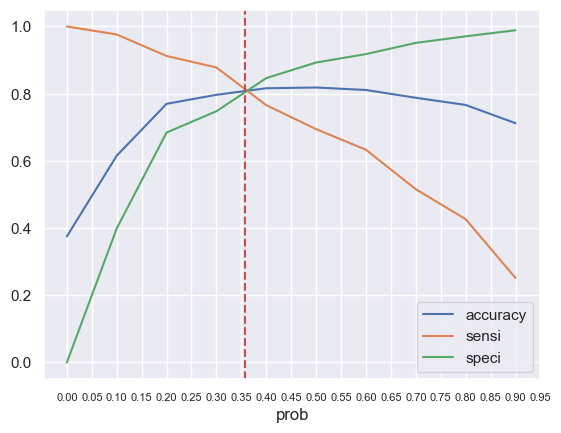

In [116]:
# Plotting accuracy, sensitivity and specificity for various probabilities


#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--')

plt.show()

From the curve above, 0.358 is the optimal cutoff point to take

In [117]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [118]:
# Dropping the unnecessary columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [119]:
y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.468069         4515                1
1          0        0.446324         9190                1
2          0        0.152483         7044                0
3          0        0.295040          245                0
4          1        0.783553         5339                1

Assigning lead score to the leads based to prediction

In [120]:
# Assigning the 'Lead_Score' based on 'Converted_Prob'

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [121]:
# Selecting only important columns and displaying head of dataframe

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.468069         4515                1          47
1          0        0.446324         9190                1          45
2          0        0.152483         7044                0          15
3          0        0.295040          245                0          30
4          1        0.783553         5339                1          78

### Model Evaluation

In [122]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3199  704]
 [ 486 1857]]


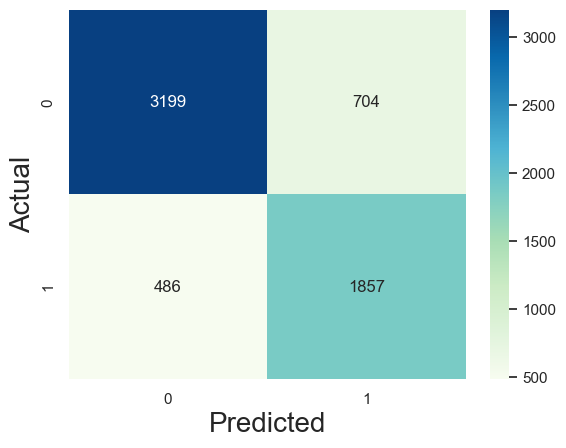

In [123]:
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [124]:
# Actual/Predicted     not_converted   converted
        # not_converted        3199          704
        # converted            486          1857 

In [125]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094780659622158

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7925736235595391

In [128]:
# Calculating specificity

TN / float(TN+FP)

0.8196259287727389

In [129]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.18037407122726107


In [130]:
# positive predictive value

print (TP / float(TP+FP))

0.725107379929715


In [131]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8681139755766621


### Precision and Recall

#### Precision
##### TP / TP + FP

In [132]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.725107379929715

#### Recall
##### TP / TP + FN

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7925736235595391

In [134]:
# Calculating Precision value using sklearn library

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.725107379929715

In [135]:
#Calculating Recall value using sklearn library

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7925736235595391

### Observations:

- We have the following values for the Train Data:
    - Accuracy : 80.94%
    - Sensitivity : 79.25%
    - Specificity : 81.961%
    - Pricision : 72.51%
    - Recall : 79.25%

## Plotting the ROC Curve

- An ROC curve demonstrates several things:
    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

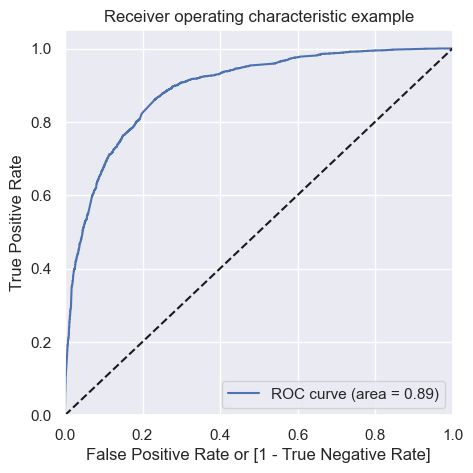

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- Observation
    - We are getting a good value of 0.89 indicating a good predictive model as ROC Curve should be as close to 1 as possible

Precision and recall tradeoff

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

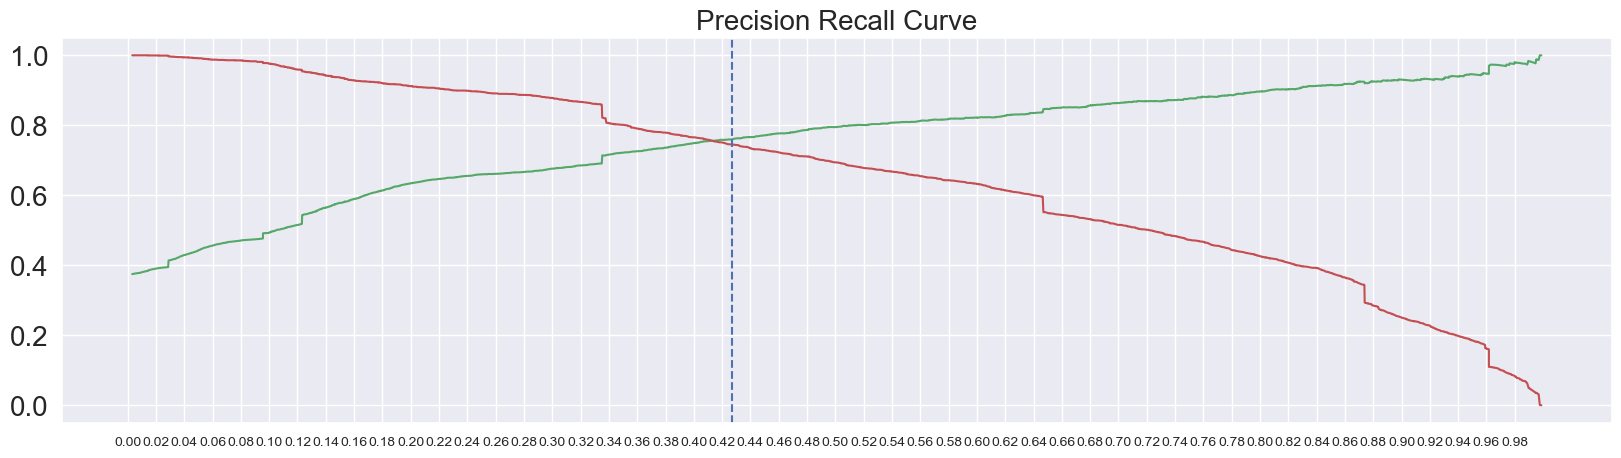

In [140]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--')
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

- Observation
    - From above above 'precision_recall_curve' we can see that cutoff point is 0.427
    - Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation


In [141]:
# plotting the Train dataset again with 0.427 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.468069         4515                1          47                  1
1          0        0.446324         9190                1          45                  1
2          0        0.152483         7044                0          15                  0
3          0        0.295040          245                0          30                  0
4          1        0.783553         5339                1          78                  1

In [142]:
# Confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3351  552]
 [ 597 1746]]


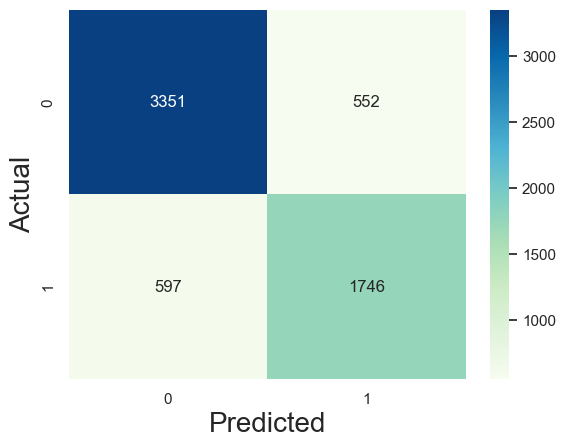

In [143]:
# Plotting confusion matrix
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [144]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8160422670509125

In [145]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [146]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7451984635083226

In [147]:
# Calculating specificity

TN / float(TN+FP)

0.8585703305149884

In [148]:
# positive predictive value

print (TP / float(TP+FP))

0.7597911227154047


In [149]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8487841945288754


In [150]:
# Pricision

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7597911227154047

In [151]:
# Recall

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7451984635083226

- Observation

    - By using the Precision - Recall trade off curve cut off point True Positive has decreased and True Negative has increased
    - Thus, we cannot use Precision-Recall trade-off method as it has reduced the True Positive as such Recall/sensitivity has decreased. We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.358 as optimal cutoff point.

### Making predictions on the test set

In [152]:
# Applying 'transform' to scale the 'test' data set

X_test[['totalvisits','total time spent on website','page views per visit']] = scaler.transform(X_test[['totalvisits','total time spent on website','page views per visit']])

In [153]:
# Predicting using values used by the final model - Model 3

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [154]:
#Displaying info about columns

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 8122 to 3113
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2678 non-null   float64
 1   lead origin_Landing Page Submission                   2678 non-null   int32  
 2   lead origin_Lead Add Form                             2678 non-null   int32  
 3   lead source_Olark Chat                                2678 non-null   int32  
 4   last activity_Converted to Lead                       2678 non-null   int32  
 5   last activity_Email Bounced                           2678 non-null   int32  
 6   last activity_Had a Phone Conversation                2678 non-null   int32  
 7   last activity_Olark Chat Conversation                 2678 non-null   int32  
 8   last activity_SMS Sent                                2678 n

In [155]:
# Predicting on test data set using final model

y_test_pred = logm3.predict(X_test)

In [156]:
# Checking top 10 rows

y_test_pred.head(10)

8122    0.170394
2127    0.961742
6481    0.331682
1615    0.646526
2278    0.123116
7572    0.028613
8007    0.019676
534     0.399233
2048    0.202869
3677    0.310988
dtype: float64

In [157]:
# Converting y_test_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
# Adding 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [160]:
# Removing index for both the dataframes inorder to append them

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
# Displaying head of 'y_pred_final'

y_pred_final.head()

converted  Prospect ID         0
0          0         8122  0.170394
1          1         2127  0.961742
2          0         6481  0.331682
3          1         1615  0.646526
4          0         2278  0.123116

In [163]:
# Renaming the column '0' as 'Converted_Prob'

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','converted','Converted_Prob']]

In [165]:
y_pred_final.head()

Prospect ID  converted  Converted_Prob
0         8122          0        0.170394
1         2127          1        0.961742
2         6481          0        0.331682
3         1615          1        0.646526
4         2278          0        0.123116

In [166]:
#Assigning 'Lead Score' to dataframe 'y_pred_final'

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [167]:
y_pred_final.head()

Prospect ID  converted  Converted_Prob  Lead_Score
0         8122          0        0.170394          17
1         2127          1        0.961742          96
2         6481          0        0.331682          33
3         1615          1        0.646526          65
4         2278          0        0.123116          12

Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [168]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [169]:
y_pred_final.head()


Prospect ID  converted  Converted_Prob  Lead_Score  final_Predicted
0         8122          0        0.170394          17                0
1         2127          1        0.961742          96                1
2         6481          0        0.331682          33                0
3         1615          1        0.646526          65                1
4         2278          0        0.123116          12                0

#### Test model evaluation

In [170]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.7991038088125467

In [171]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_Predicted )
confusion2

array([[1341,  311],
       [ 227,  799]], dtype=int64)

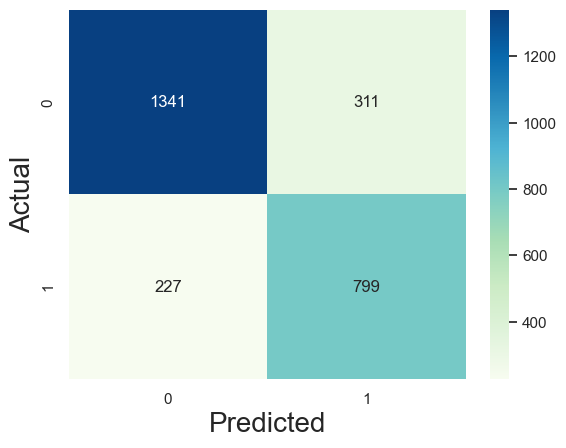

In [186]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# sensitivity

TP / float(TP+FN)

0.7787524366471735

In [175]:
# specificity:-

TN / float(TN+FP)

0.8117433414043583

In [176]:
# Calculate False Postive Rate - predicting conversion when customer does not convert

print(FP/ float(TN+FP))

0.18825665859564164


In [177]:
# positive predictive value

print (TP / float(TP+FP))

0.7198198198198198


In [178]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8552295918367347


In [179]:
# Calculating 'precision_score'

precision_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.7198198198198198

In [180]:
#Calculating 'recall_score'

recall_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.7787524366471735

- Observation
    - The sensitivity value for test data is 77.87% while for train data it is 79.25%. 
    - The accuracy values is almost 80% for both, which shows that model is performing well for test data set as well.

### Determining top features based on the final model

In [184]:
# Displaying parameters obtained by final model

logm3.params

const                                                  -0.89
lead origin_Landing Page Submission                    -0.34
lead origin_Lead Add Form                               3.80
lead source_Olark Chat                                  1.18
last activity_Converted to Lead                        -1.12
last activity_Email Bounced                            -1.07
last activity_Had a Phone Conversation                  2.25
last activity_Olark Chat Conversation                  -1.56
last activity_SMS Sent                                  1.29
last activity_Unsubscribed                              1.08
what is your current occupation_Not Specified          -1.28
what is your current occupation_Working Professional    2.55
do not email                                           -1.20
total time spent on website                             1.11
dtype: float64

### Final model equation:

converted = −0.8938 + (−0.3402 × lead origin_Landing Page Submission) + (3.8049 × lead origin_Lead Add Form) + (1.1843 × lead source_Olark Chat) + (−1.1218 × last activity_Converted to Lead) + (−1.0678 × last activity_Email Bounced) + (2.2467 × last activity_Had a Phone Conversation) + (−1.5616 × last activity_Olark Chat Conversation) + (1.2895 × last activity_SMS Sent) + (1.0815 × last activity_Unsubscribed) + (−1.2776 × what is your current occupation_Not Specified) + (2.5511 × what is your current occupation_Working Professional) + (−1.1981 × do not email) + (1.108 × total time spent on website)

### Final Observations and Summary

- Evaluation Metrics for the train Dataset
    - Accuracy: 80.94
    - Sensitivity: 79.25
    - Specificity: 81.96
    - Precision: 72.51
    - Recall: 79.25

- Evaluation Metrics for the test Dataset
    - Accuracy : 79.91
    - Sensitivity: 77.87
    - Specificity: 81.17
    - Precision: 71.98
    - Recall: 77.87

- Positive Coefficients: Predictors with positive coefficients increase the likelihood of conversion.
    - Lead origin_Lead Add Form: Strong positive effect (Coef: 3.8049).
    - Lead source_Olark Chat: Positive effect (Coef: 1.1843).
    - Last activity_Had a Phone Conversation: Positive effect (Coef: 2.2467).
    - Last activity_SMS Sent: Positive effect (Coef: 1.2895).
    - Last activity_Unsubscribed: Positive effect (Coef: 1.0815).
    - Occupation_Working Professional: Positive effect (Coef: 2.5511).
    - Total time spent on website: Strong positive effect (Coef: 1.108).

 - Negative Coefficients: Predictors with negative coefficients decrease the likelihood of conversion.
    - Lead origin_Landing Page Submission: Negative effect (Coef: -0.3402).
    - Last activity_Converted to Lead: Negative effect (Coef: -1.1218).
    - Last activity_Email Bounced: Negative effect (Coef: -1.0678).
    - Last activity_Olark Chat Conversation: Negative effect (Coef: -1.5616).
    - Occupation_Not Specified: Negative effect (Coef: -1.2776).
    - Do not email: Negative effect (Coef: -1.1981)

### Recommendation
- To improve the potential lead conversion rate X-Education will have to mainly focus on the important features responsible for good conversion rate which are:

    - Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

    - Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.

    - What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals and try to get more number of leads.

    - Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.

    - Total Time Spent on website: Leads spending more time on website can be our potential lead.

